# Porównanie algorytmów grupowania k średnich i DBSCAN z zastosowaniem redukcji wymiarów przy użyciu metody PCA oraz bez jej zastosowania.

## Cel badania

Celem tej analizy jest porównanie grupowania za pomocą metod k średnich i DBSCAN z redukcją wymiarów metodą PCA i bez redukcji. Badanie rozpocznie się wstępną transformacją danych, aby nadawały się do dalszej analizy oraz celem wizualizacji. Kolejnym krokiem jest przeprowadzenie analizy, jej interpretacja, ocena jakości oraz porównanie wyników. Etapem końcowym jest wyprowadzenie prognoz oraz zebranie wniosków z całego badania.

## Opis zbioru danych

Zbiór danych stanowi kolekcję ofert samochodów używanych dostępnych na rynku brytyjskim. Zbiór liczy ponad 100 000 ofert. Ostatnia aktualizacja zbioru miała miejsce w 2020 roku. Zestaw danych zawiera informacje o cenie, rodzaju skrzyni biegów, przebiegu, rodzaju wykorzystywanego paliwa, podatku drogowym, milach na galon (mpg) i rozmiarze silnika.<br>Link do danych: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

## Wybór modeli

Założeniem projektu jest porównanie dwóch metod grupowania: metody k średnich i DBSCAN. W tym przypadku grupowanie polega na segmentacji samochodów w oparciu o wspólne cechy. Grupowanie metodą k średnich to grupowanie samochodów w klastry bazując na wybranych cechach, a algorytm DBSCAN to wykrywanie wartości odstających i grupowanie samochodów w klastry bez konieczności wcześniejszego określania liczby klastrów. W celu umożliwienia wizualizacji wyników grupowania zostanie zastosowany algorytm PCA, aby zredukować wymiarowość zbioru przy jednoczesnym zachowaniu jego różnorodności. Wyniki te zostaną porównane z modelami użytymi bez zmniejszenia liczby wymiarów, ale na podstawie współczynnika silhouette.

## Przygotowanie zbioru do analizy

Import bibliotek

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
%matplotlib widget

Pobranie baz danych i wstępna analiza

In [ ]:
audi = pd.read_csv("audi.csv")
audi.insert(0, 'brand', 'Audi')
audi

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,Audi,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,Audi,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,Audi,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Audi,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [ ]:
bmw = pd.read_csv("bmw.csv")
bmw.insert(0, 'brand', 'BMW')
bmw

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,BMW,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,BMW,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,BMW,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,BMW,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,BMW,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...,...
10776,BMW,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,BMW,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,BMW,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,BMW,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [ ]:
cclass = pd.read_csv("cclass.csv")
cclass.insert(0, 'brand', 'Mercedes')
cclass

,brand,model,year,price,transmission,mileage,fuelType,engineSize
0,Mercedes,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,Mercedes,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,Mercedes,C Class,2020,37899,Automatic,500,Diesel,2.0
3,Mercedes,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,Mercedes,C Class,2019,29899,Automatic,4500,Diesel,2.0
...,...,...,...,...,...,...,...,...
3894,Mercedes,C Class,2017,14700,Manual,31357,Diesel,1.6
3895,Mercedes,C Class,2018,18500,Automatic,28248,Diesel,2.1
3896,Mercedes,C Class,2014,11900,Manual,48055,Diesel,2.1
3897,Mercedes,C Class,2014,11300,Automatic,49865,Diesel,2.1


In [ ]:
focus = pd.read_csv("focus.csv")
focus.insert(0, 'brand', 'Ford')
focus

,brand,model,year,price,transmission,mileage,fuelType,engineSize
0,Ford,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Ford,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Ford,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Ford,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Ford,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...,...
5449,Ford,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Ford,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Ford,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Ford,Focus,2019,17310,Automatic,13376,Petrol,1.0


In [ ]:
ford = pd.read_csv("ford.csv")
ford.insert(0, 'brand', 'Ford')
ford

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Ford,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Ford,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Ford,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Ford,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Ford,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
17960,Ford,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,Ford,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,Ford,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Ford,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [ ]:
hyundai = pd.read_csv("hyundi.csv")
hyundai.insert(0, 'brand', 'Hyundai')
hyundai

,brand,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,Hyundai,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Hyundai,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Hyundai,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,Hyundai,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,Hyundai,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...,...
4855,Hyundai,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,Hyundai,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,Hyundai,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Hyundai,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


In [ ]:
merc = pd.read_csv("merc.csv")
merc.insert(0, 'brand', 'Mercedes')
merc

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Mercedes,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,Mercedes,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,Mercedes,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,Mercedes,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,Mercedes,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...,...
13114,Mercedes,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,Mercedes,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,Mercedes,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,Mercedes,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [ ]:
skoda = pd.read_csv("skoda.csv")
skoda.insert(0, 'brand', 'Skoda')
skoda

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Skoda,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Skoda,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Skoda,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Skoda,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Skoda,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
...,...,...,...,...,...,...,...,...,...,...
6262,Skoda,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2
6263,Skoda,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4
6264,Skoda,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0
6265,Skoda,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0


In [ ]:
toyota = pd.read_csv("toyota.csv")
toyota.insert(0, 'brand', 'Toyota')
toyota

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Toyota,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,Toyota,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,Toyota,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,Toyota,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,Toyota,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...,...
6733,Toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [ ]:
unclean_cclass = pd.read_csv("unclean cclass.csv")
unclean_cclass.insert(0, 'brand', 'Mercedes')
unclean_cclass

,brand,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Mercedes,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,Mercedes,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,Mercedes,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,Mercedes,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,Mercedes,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...,...
4001,Mercedes,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,Mercedes,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,Mercedes,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,Mercedes,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


Jak sama nazwa wskazuje, dane nie są wyczyszczone i są wybrakowane i niespójne. Jednakże istnieje już baza danych cclass.csv, więc tę bazę danych można odrzucić.

In [ ]:
unclean_focus = pd.read_csv("unclean focus.csv")
unclean_focus.insert(0, 'brand', 'Ford')
unclean_focus

,brand,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Ford,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
1,Ford,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
2,Ford,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
3,Ford,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
4,Ford,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057
...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Ford,Focus,2019.0,"£18,745",Manual,NaN,Diesel,2,"7,855",NaN,NaN,/ad/25149519
5600,Ford,Focus,2019.0,"£16,350",Manual,NaN,Petrol,1,"13,891",NaN,NaN,/ad/25149523
5601,Ford,Focus,2019.0,"£16,850",Manual,NaN,Petrol,1,"13,452",NaN,NaN,/ad/25149532
5602,Ford,Focus,2019.0,"£17,310",Automatic,NaN,Petrol,1,"13,376",NaN,NaN,/ad/25149535


Ten sam przypadek co unclean cclass.csv. Jak sama nazwa wskazuje, dane nie są wyczyszczone i są wybrakowane i niespójne. Jednakże istnieje już baza danych cclass.csv, więc tę bazę danych można odrzucić.

In [ ]:
vauxhall = pd.read_csv("vauxhall.csv")
vauxhall.insert(0, 'brand', 'Vauxhall')
vauxhall

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Vauxhall,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Vauxhall,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Vauxhall,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Vauxhall,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Vauxhall,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4
...,...,...,...,...,...,...,...,...,...,...
13627,Vauxhall,Tigra,2007,2499,Manual,48640,Petrol,165,46.3,1.4
13628,Vauxhall,Vectra,2007,1795,Manual,75000,Petrol,240,39.2,1.8
13629,Vauxhall,Vectra,2005,1495,Manual,74000,Petrol,235,38.7,1.8
13630,Vauxhall,Vectra,2008,1695,Automatic,131000,Diesel,200,39.8,1.9


In [ ]:
vw = pd.read_csv("vw.csv")
vw.insert(0, 'brand', 'Volkswagen')
vw

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Volkswagen,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,Volkswagen,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,Volkswagen,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,Volkswagen,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,Volkswagen,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...,...
15152,Volkswagen,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Volkswagen,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Volkswagen,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Volkswagen,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [16]:
count_cclass = merc['model'].value_counts().get(' C Class')
count_cclass

3747

In [17]:
count_cclass_ = cclass['model'].value_counts().get(' C Class')
count_cclass_

3899

In [18]:
cclass.isna().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
dtype: int64

Plik cclass.csv zawiera 3899 obserwacji, wszystkie dotyczą modelu C Class, jednak w pliku merc.csv obserwacji modelu C Class jest 3747. W pliku cclass.csv nie ma braków danych, więc do bazy danych Mercedesa można dodać te rekordy z pliku cclass.csv, które nie pojawiają się w pliku merc.csv

In [19]:
unique_cclass = cclass[~cclass.apply(tuple, 1).isin(merc.apply(tuple, 1))]
merc = pd.concat([merc, unique_cclass], ignore_index=True)
merc

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Mercedes,SLK,2005,5200,Automatic,63000,Petrol,325.0,32.1,1.8
1,Mercedes,S Class,2017,34948,Automatic,27000,Hybrid,20.0,61.4,2.1
2,Mercedes,SL CLASS,2016,49948,Automatic,6200,Petrol,555.0,28.0,5.5
3,Mercedes,G Class,2016,61948,Automatic,16000,Petrol,325.0,30.4,4.0
4,Mercedes,G Class,2016,73948,Automatic,4000,Petrol,325.0,30.1,4.0
...,...,...,...,...,...,...,...,...,...,...
17013,Mercedes,C Class,2017,14700,Manual,31357,Diesel,NaN,NaN,1.6
17014,Mercedes,C Class,2018,18500,Automatic,28248,Diesel,NaN,NaN,2.1
17015,Mercedes,C Class,2014,11900,Manual,48055,Diesel,NaN,NaN,2.1
17016,Mercedes,C Class,2014,11300,Automatic,49865,Diesel,NaN,NaN,2.1


In [20]:
merc.isna().sum()

brand              0
model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             3899
mpg             3899
engineSize         0
dtype: int64

Okazuje się jednak, że liczba kolumn w zbiorze cclass.csv jest mniejsza od liczby kolumn w zbiorze merc.csv. W związku z tym nie można po prostu dodać unikalnych wartości z bazy cclass do bazy merc. Można spróbować imputować braki danych.

In [21]:
knn_columns = ['mpg', 'year', 'price', 'mileage', 'engineSize']
knn_imputer = KNNImputer(n_neighbors=2)

merc[knn_columns] = knn_imputer.fit_transform(merc[knn_columns])
merc['mpg'] = merc['mpg'].round(1)

In [22]:
X = merc[['year', 'mileage', 'engineSize', 'price', 'mpg']].copy()
y = merc['tax']

X_train = X[~y.isna()]
y_train = y[~y.isna()]
X_test = X[y.isna()]

reg = LinearRegression()
reg.fit(X_train, y_train)

merc.loc[merc['tax'].isna(), 'tax'] = np.clip(reg.predict(X_test), 0, None)
merc['tax'] = merc['tax'].round(0).astype(int)

Wykorzystano dwa rodzaje imputacji - do uzupełnienia kolumny mpg wykorzystano metodę k najbliższych sąsiadów, a do uzupełnienia kolumny tax wykorzystano regresję liniową.

In [23]:
merc

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Mercedes,SLK,2005.0,5200.0,Automatic,63000.0,Petrol,325,32.1,1.8
1,Mercedes,S Class,2017.0,34948.0,Automatic,27000.0,Hybrid,20,61.4,2.1
2,Mercedes,SL CLASS,2016.0,49948.0,Automatic,6200.0,Petrol,555,28.0,5.5
3,Mercedes,G Class,2016.0,61948.0,Automatic,16000.0,Petrol,325,30.4,4.0
4,Mercedes,G Class,2016.0,73948.0,Automatic,4000.0,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...,...
17013,Mercedes,C Class,2017.0,14700.0,Manual,31357.0,Diesel,105,62.0,1.6
17014,Mercedes,C Class,2018.0,18500.0,Automatic,28248.0,Diesel,112,64.2,2.1
17015,Mercedes,C Class,2014.0,11900.0,Manual,48055.0,Diesel,104,69.1,2.1
17016,Mercedes,C Class,2014.0,11300.0,Automatic,49865.0,Diesel,130,55.4,2.1


Efektem ubocznym imputacji danych stała się zmiana typów danych dla zmiennych year, price i mileage, co należałoby odwrócić.

In [24]:
merc['year'] = merc['year'].astype(int)
merc['price'] = merc['price'].astype(int)
merc['mileage'] = merc['mileage'].astype(int)

In [25]:
merc.isna().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [26]:
merc

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Mercedes,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,Mercedes,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,Mercedes,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,Mercedes,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,Mercedes,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...,...
17013,Mercedes,C Class,2017,14700,Manual,31357,Diesel,105,62.0,1.6
17014,Mercedes,C Class,2018,18500,Automatic,28248,Diesel,112,64.2,2.1
17015,Mercedes,C Class,2014,11900,Manual,48055,Diesel,104,69.1,2.1
17016,Mercedes,C Class,2014,11300,Automatic,49865,Diesel,130,55.4,2.1


In [27]:
merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17018 entries, 0 to 17017
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         17018 non-null  object 
 1   model         17018 non-null  object 
 2   year          17018 non-null  int32  
 3   price         17018 non-null  int32  
 4   transmission  17018 non-null  object 
 5   mileage       17018 non-null  int32  
 6   fuelType      17018 non-null  object 
 7   tax           17018 non-null  int32  
 8   mpg           17018 non-null  float64
 9   engineSize    17018 non-null  float64
dtypes: float64(2), int32(4), object(4)
memory usage: 1.0+ MB


Braki zostały usunięte, a typy danych są akceptowalne.

In [28]:
count_focus = ford['model'].value_counts().get(' Focus')
count_focus

4588

In [29]:
count_focus_ = focus['model'].value_counts().get(' Focus')
count_focus_

5454

In [30]:
focus.isna().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
dtype: int64

Plik focus.csv zawiera 5454 obserwacji, wszystkie dotyczą modelu Focus, jednak w pliku ford.csv obserwacji modelu Focus jest 4588. W pliku focus.csv nie ma braków danych, więc do bazy danych Forda można dodać te rekordy z pliku focus.csv, które nie pojawiają się w pliku ford.csv

In [31]:
unique_focus = focus[~focus.apply(tuple, 1).isin(ford.apply(tuple, 1))]
ford = pd.concat([ford, unique_focus], ignore_index=True)
ford

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Ford,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0
1,Ford,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0
2,Ford,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0
3,Ford,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5
4,Ford,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
23414,Ford,Focus,2019,18745,Manual,7855,Diesel,NaN,NaN,2.0
23415,Ford,Focus,2019,16350,Manual,13891,Petrol,NaN,NaN,1.0
23416,Ford,Focus,2019,16850,Manual,13452,Petrol,NaN,NaN,1.0
23417,Ford,Focus,2019,17310,Automatic,13376,Petrol,NaN,NaN,1.0


In [32]:
ford.isna().sum()

brand              0
model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             5454
mpg             5454
engineSize         0
dtype: int64

Ponownie okazuje się jednak, że liczba kolumn w zbiorze focus.csv jest mniejsza od liczby kolumn w zbiorze ford.csv. W związku z tym nie można po prostu dodać unikalnych wartości z bazy focus do bazy ford. Kolejny raz można spróbować imputować braki danych.

In [33]:
knn_columns = ['mpg', 'year', 'price', 'mileage', 'engineSize']
knn_imputer = KNNImputer(n_neighbors=2)

ford[knn_columns] = knn_imputer.fit_transform(ford[knn_columns])
ford['mpg'] = ford['mpg'].round(1)

In [34]:
X = ford[['year', 'mileage', 'engineSize', 'price', 'mpg']].copy()
y = ford['tax']

X_train = X[~y.isna()]
y_train = y[~y.isna()]
X_test = X[y.isna()]

reg = LinearRegression()
reg.fit(X_train, y_train)

ford.loc[ford['tax'].isna(), 'tax'] = np.clip(reg.predict(X_test), 0, None)
ford['tax'] = ford['tax'].round(0).astype(int)

In [35]:
ford

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Ford,Fiesta,2017.0,12000.0,Automatic,15944.0,Petrol,150,57.7,1.0
1,Ford,Focus,2018.0,14000.0,Manual,9083.0,Petrol,150,57.7,1.0
2,Ford,Focus,2017.0,13000.0,Manual,12456.0,Petrol,150,57.7,1.0
3,Ford,Fiesta,2019.0,17500.0,Manual,10460.0,Petrol,145,40.3,1.5
4,Ford,Fiesta,2019.0,16500.0,Automatic,1482.0,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
23414,Ford,Focus,2019.0,18745.0,Manual,7855.0,Diesel,191,40.9,2.0
23415,Ford,Focus,2019.0,16350.0,Manual,13891.0,Petrol,137,54.8,1.0
23416,Ford,Focus,2019.0,16850.0,Manual,13452.0,Petrol,122,60.1,1.0
23417,Ford,Focus,2019.0,17310.0,Automatic,13376.0,Petrol,155,48.4,1.0


In [36]:
ford['year'] = ford['year'].astype(int)
ford['price'] = ford['price'].astype(int)
ford['mileage'] = ford['mileage'].astype(int)

In [37]:
ford.isna().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [38]:
ford

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Ford,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Ford,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Ford,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Ford,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Ford,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
23414,Ford,Focus,2019,18745,Manual,7855,Diesel,191,40.9,2.0
23415,Ford,Focus,2019,16350,Manual,13891,Petrol,137,54.8,1.0
23416,Ford,Focus,2019,16850,Manual,13452,Petrol,122,60.1,1.0
23417,Ford,Focus,2019,17310,Automatic,13376,Petrol,155,48.4,1.0


In [39]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23419 entries, 0 to 23418
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         23419 non-null  object 
 1   model         23419 non-null  object 
 2   year          23419 non-null  int32  
 3   price         23419 non-null  int32  
 4   transmission  23419 non-null  object 
 5   mileage       23419 non-null  int32  
 6   fuelType      23419 non-null  object 
 7   tax           23419 non-null  int32  
 8   mpg           23419 non-null  float64
 9   engineSize    23419 non-null  float64
dtypes: float64(2), int32(4), object(4)
memory usage: 1.4+ MB


Jak widać powyżej, zastosowano te same metody imputacji danych oraz rozwiązano ten sam problem, co w przypadku uzupełniania zbioru danych merc. Dla zbioru ford operacja ponownie zakończyła się sukcesem.

In [40]:
dfs = [audi, bmw, ford, hyundai, merc, skoda, toyota, vauxhall, vw]
data = pd.concat(dfs, ignore_index=True)
data

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,Volkswagen,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,NaN
108536,Volkswagen,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,NaN
108537,Volkswagen,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,NaN
108538,Volkswagen,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,NaN


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         108540 non-null  object 
 1   model         108540 non-null  object 
 2   year          108540 non-null  int64  
 3   price         108540 non-null  int64  
 4   transmission  108540 non-null  object 
 5   mileage       108540 non-null  int64  
 6   fuelType      108540 non-null  object 
 7   tax           103680 non-null  float64
 8   mpg           108540 non-null  float64
 9   engineSize    108540 non-null  float64
 10  tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.1+ MB


Typy danych są satysfakcjonujące, jednak widoczne są braki danych.

In [ ]:
data.isna().sum()

brand                0
model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
tax               4860
mpg                  0
engineSize           0
tax(£)          103680
dtype: int64

W kolumnie tax(£) jest bardzo dużo braków danych, a w kolumnie tax jest już zdecydowanie mniej. Po weryfikacji opisu obu zmiennych wniosek jest taki, że zmienne te są tożsame, jednak mają inną nazwę. Trzeba to zweryfikować.

In [43]:
data.isna().sum().sum()

108540

Suma wszystkich braków daje sumę rekordów, więc braki w kolumnach uzupełniają się wzajemnie.

In [44]:
data_null_tax = data[data['tax'].isnull()]
data_null_tax

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
44868,Hyundai,I20,2017,7999,Manual,17307,Petrol,NaN,58.9,1.2,145.0
44869,Hyundai,Tucson,2016,14499,Automatic,25233,Diesel,NaN,43.5,2.0,235.0
44870,Hyundai,Tucson,2016,11399,Manual,37877,Diesel,NaN,61.7,1.7,30.0
44871,Hyundai,I10,2016,6499,Manual,23789,Petrol,NaN,60.1,1.0,20.0
44872,Hyundai,IX35,2015,10199,Manual,33177,Diesel,NaN,51.4,2.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...
49723,Hyundai,I30,2016,8680,Manual,25906,Diesel,NaN,78.4,1.6,0.0
49724,Hyundai,I40,2015,7830,Manual,59508,Diesel,NaN,65.7,1.7,30.0
49725,Hyundai,I10,2017,6830,Manual,13810,Petrol,NaN,60.1,1.0,20.0
49726,Hyundai,Tucson,2018,13994,Manual,23313,Petrol,NaN,44.8,1.6,145.0


Widać, że braki dla kolumny tax występują dla samochodów marki Hyundai, ale czy tylko?

In [45]:
print(data_null_tax['brand'].unique())

['Hyundai']


Tak więc jedyną bazą, w której były braki danych w kolumnie tax jest baza samochodów marki Hyundai.

In [46]:
data_null_tax_pound = data[data['tax(£)'].isnull()]
data_null_tax_pound

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,Volkswagen,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,NaN
108536,Volkswagen,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,NaN
108537,Volkswagen,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,NaN
108538,Volkswagen,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,NaN


In [47]:
print(data_null_tax_pound['brand'].unique())

['Audi' 'BMW' 'Ford' 'Mercedes' 'Skoda' 'Toyota' 'Vauxhall' 'Volkswagen']


Mamy potwierdzenie, że braki danych są związane z niejednolitym nazewnictwem kolumn w bazach danych, ponieważ braki danych dla kolumny tax(£) występują dla każdej marki samochodu oprócz marki Hyundai.

In [48]:
data['tax'] = data['tax'].fillna(data['tax(£)'])
data.isna().sum()

brand                0
model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
tax                  0
mpg                  0
engineSize           0
tax(£)          103680
dtype: int64

In [49]:
data.drop('tax(£)', axis='columns', inplace=True)
data.isna().sum().sum()

0

Aby pozbyć się braków danych, braki w kolumnie tax uzupełniono wartościami z kolumny tax(£), a następnie usunięto kolumnę tax(£) i tym samym pozbyto się braków.

In [50]:
for column in data:
    print(data[column].unique())

['Audi' 'BMW' 'Ford' 'Hyundai' 'Mercedes' 'Skoda' 'Toyota' 'Vauxhall'
 'Volkswagen']
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 ' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' ' I20'
 ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona' ' Veloster'
 ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz' ' Amica' ' SLK'
 ' S Class' ' SL CLASS' ' G Class' ' GLE Class' ' GLA Class' ' A Class'
 ' B Class' ' GLC Class' ' C Class' ' E Class' ' GL Class' ' CLS

Na ogół wartości, jakie rekordy przyjmują dla poszczególnych kolumn, wyglądają na rozsądne. Wyjątkiem jest rok 2060, którego z pewnością nie powinno być w danych. Dane z tym rokiem zostaną usunięte.

In [51]:
data = data[data['year'] != 2060]
data

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
108535,Volkswagen,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Volkswagen,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Volkswagen,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Volkswagen,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


Teraz można przystąpić do analizy danych.

## Wizualizacja danych

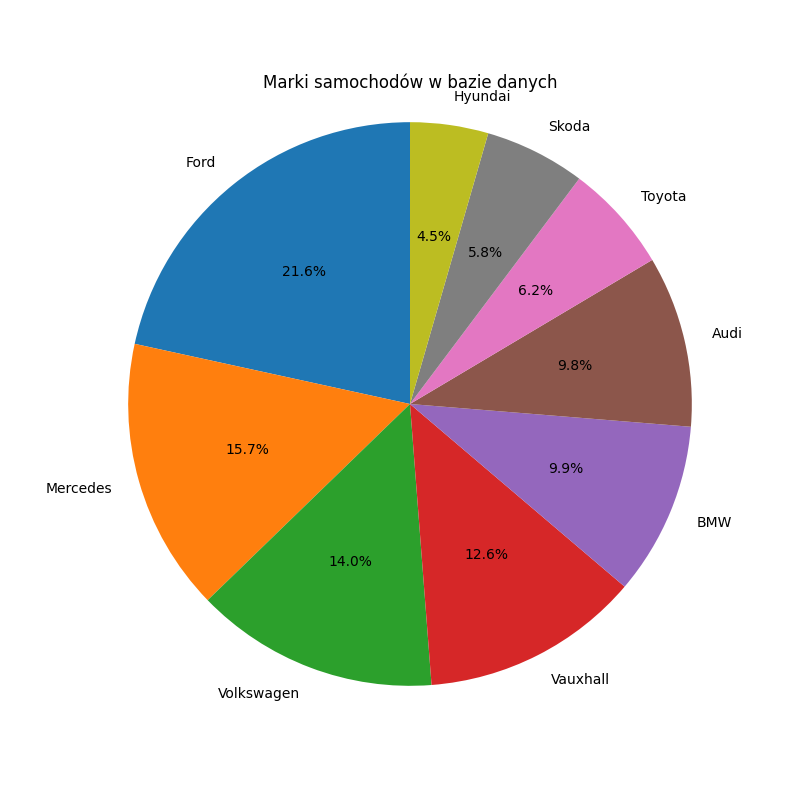

In [52]:
plt.figure(figsize=(8, 8))
plt.pie(data['brand'].value_counts(), labels=data['brand'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Marki samochodów w bazie danych')
plt.axis('equal')
plt.show()

Najczęściej występującą w bazie danych marką samochodu jest Ford - 21,6%, następnie Mercedes - 15,7%, a tuż za nimi Volkswagen - 14%. Marką pojawiającą się najrzadziej jest Hyundai - 4,5%. Widać zatem, że nie ma marki znacznie przeważającej liczebnością nad pozostałymi

In [53]:
value_counts_year = data['year'].value_counts().reset_index()
value_counts_year.columns = ['Rok', 'Liczba rekordów']
value_counts_year

,Rok,Liczba rekordów
0,2019,29955
1,2017,23686
2,2016,16948
3,2018,15092
4,2015,8359
5,2020,4657
6,2014,4377
7,2013,2818
8,2012,702
9,2011,477


Najwięcej aut pochodzi z lat 10. XXI wieku. Starszych aut jest przytłaczająco mniej

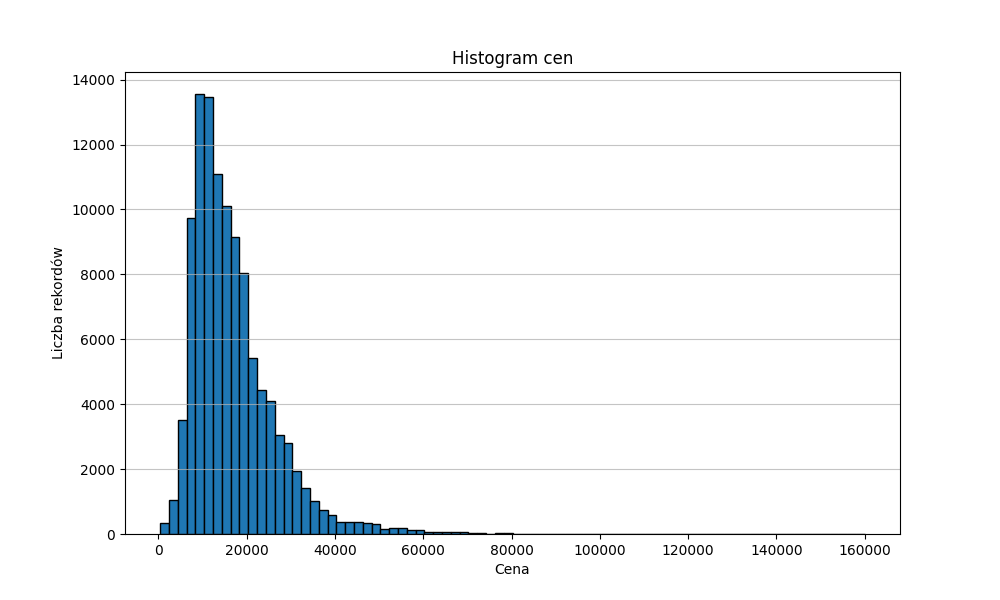

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=80, edgecolor='black')
plt.title('Histogram cen')
plt.xlabel('Cena')
plt.ylabel('Liczba rekordów')
plt.grid(axis='y', alpha=0.75)
plt.show()

Ceny samochodów najczęściej mieszczą się w przedziale do 20 tys. funtów.

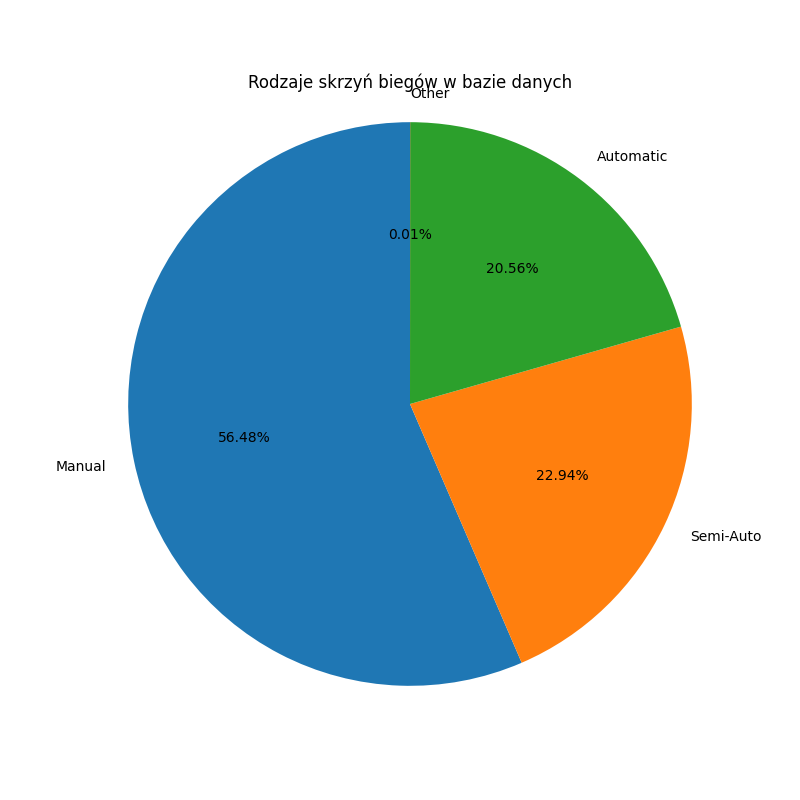

In [55]:
plt.figure(figsize=(8, 8))
plt.pie(data['transmission'].value_counts(), labels=data['transmission'].value_counts().index, autopct='%1.2f%%', startangle=90)
plt.title('Rodzaje skrzyń biegów w bazie danych')
plt.axis('equal')
plt.show()

Najczęściej występujący rodzaj skrzyni biegów w autach z badanego zbioru danych jest skrzynia manualna - 56,48%. Pojawia się rodzaj nazwany "innym", ponieważ stanowi zaledwie 0,01% zostanie on później wykluczony z analizy.

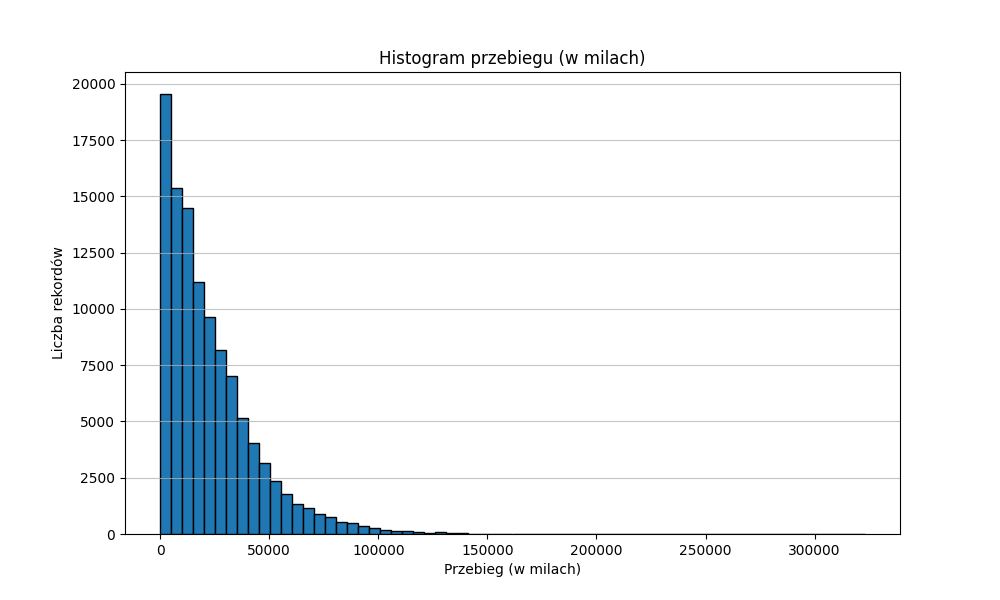

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(data['mileage'], bins=64, edgecolor='black')
plt.title('Histogram przebiegu (w milach)')
plt.xlabel('Przebieg (w milach)')
plt.ylabel('Liczba rekordów')
plt.grid(axis='y', alpha=0.75)
plt.show()

Wśród badanych samochodów dominuje przebieg do 50 tys. mil.

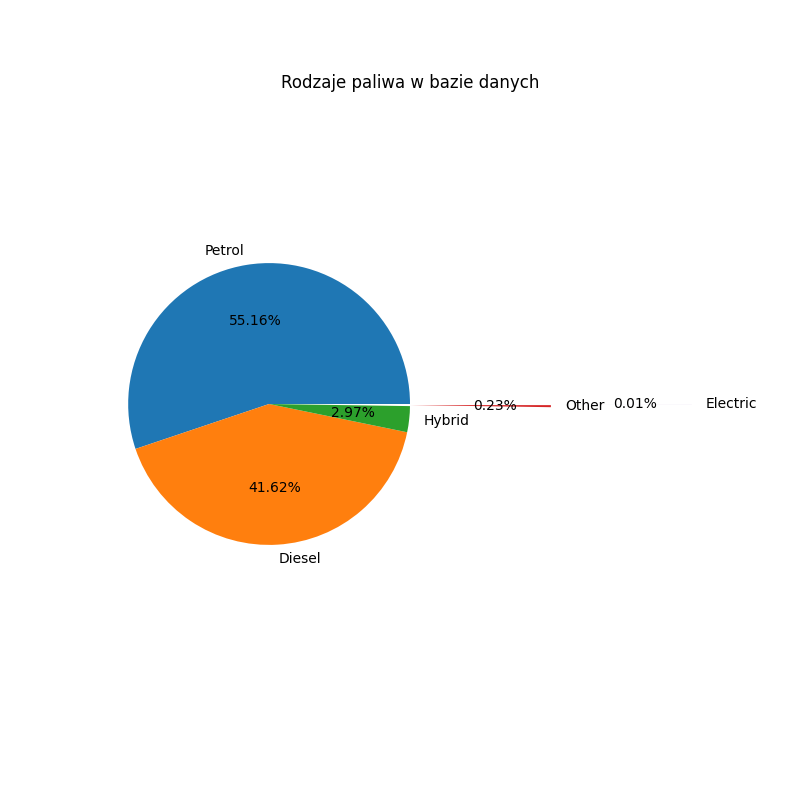

In [57]:
plt.figure(figsize=(8, 8))
plt.pie(data['fuelType'].value_counts(), labels=data['fuelType'].value_counts().index, autopct='%1.2f%%', explode=[0, 0, 0, 1, 2])
plt.title('Rodzaje paliwa w bazie danych')
plt.axis('equal')
plt.show()

Wsród rodzajów paliw dominują benzyna i diesel, mały odsetek stanowią też hybrydy, a inne typy napędu + elektryki razem stanowią 0,24%, więc zostaną usunięte z dalszej analizy.

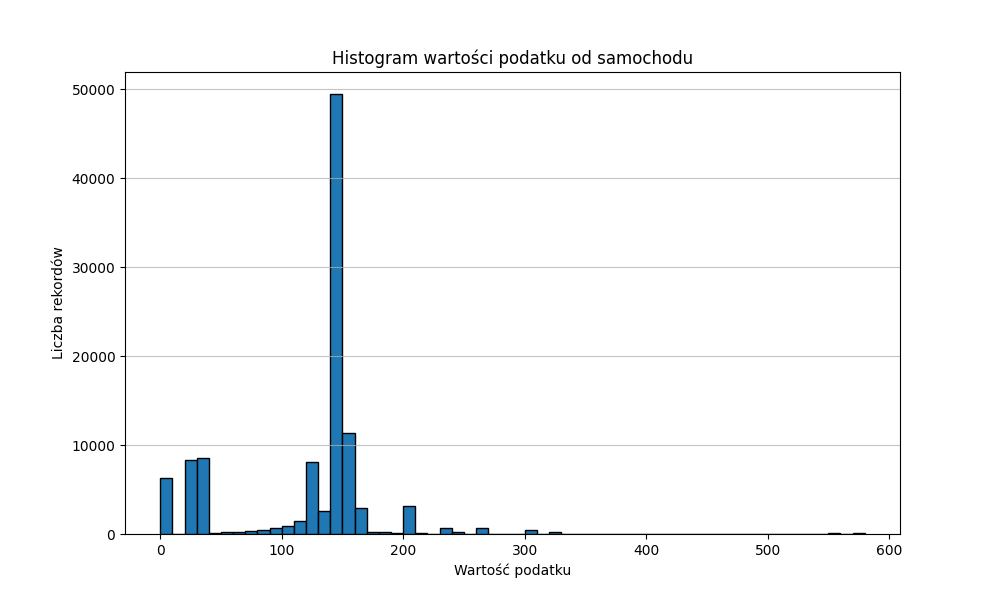

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(data['tax'], bins=58, edgecolor='black')
plt.title('Histogram wartości podatku od samochodu')
plt.xlabel('Wartość podatku')
plt.ylabel('Liczba rekordów')
plt.grid(axis='y', alpha=0.75)
plt.show()

Podatek od samochodu, lub podatek drogowy (road tax), zdecydowanie najczęściej wynosi od 100 do 200 funtów.

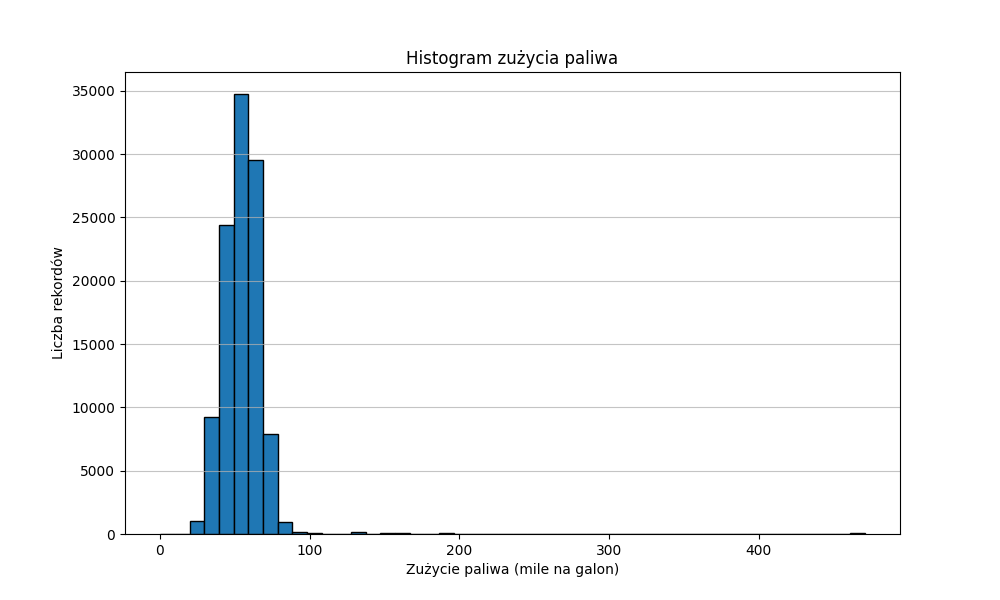

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(data['mpg'], bins=48, edgecolor='black')
plt.title('Histogram zużycia paliwa')
plt.xlabel('Zużycie paliwa (mile na galon)')
plt.ylabel('Liczba rekordów')
plt.grid(axis='y', alpha=0.75)
plt.show()

Auta z bazy danych najczęściej zużywają paliwo w przedziale do 100 mil na galon.

In [60]:
value_counts_engine = data['engineSize'].value_counts().reset_index()
value_counts_engine.columns = ['Pojemność silnika', 'Liczba rekordów']
value_counts_engine

,Pojemność silnika,Liczba rekordów
0,2.0,29506
1,1.0,19924
2,1.5,13456
3,1.4,11027
4,1.6,9463
5,1.2,6963
6,3.0,5618
7,2.1,5388
8,1.8,1755
9,1.3,1372


Dzięki tej tabeli można wyróżnić najczęściej występujące pojemności silnika samochodów.

## Przygotowanie zbioru do analizy cd.

Usuwamy cechy, które występują najrzadziej, aby nie zaburzały analizy. Na szczęście zbiór jest na tyle duży, że pozostanie bardzo dużo rekordów. Pierwszym krokiem jest usunięcie rodzaju skrzyni biegów oznaczonej jako "inny", który stanowi zaledwie 0,01% danych.

In [61]:
data = data[data['transmission'] != 'Other']

In [62]:
data

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
108535,Volkswagen,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Volkswagen,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Volkswagen,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Volkswagen,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


Usuniętych zostało tylko 10 rekordów.

In [63]:
data = data[~data['fuelType'].isin(['Other', 'Electric'])]

Kolejnym krokiem jest usunięcie danych, dla których rodzaj paliwa to "inny" i "elektrczny", ponieważ razem stanowią ok. 0,24% danych.

In [64]:
data

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
108535,Volkswagen,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Volkswagen,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Volkswagen,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Volkswagen,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


Wykluczonych zostało 258 rekordów.

In [65]:
data['transmission'] = data['transmission'].map({'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2})
data['fuelType'] = data['fuelType'].map({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2})

data = data.drop(['model'], axis='columns')

C:\Users\pafeu\AppData\Local\Temp\ipykernel_2660\2240562349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transmission'] = data['transmission'].map({'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2})
C:\Users\pafeu\AppData\Local\Temp\ipykernel_2660\2240562349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuelType'] = data['fuelType'].map({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2})


Następnie odrzucamy kolumny dot. modelu, rodzaju skrzyni biegów i rodzaju paliwa

In [66]:
data

,brand,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,2017,12500,0,15735,0,150.0,55.4,1.4
1,Audi,2016,16500,1,36203,1,20.0,64.2,2.0
2,Audi,2016,11000,0,29946,0,30.0,55.4,1.4
3,Audi,2017,16800,1,25952,1,145.0,67.3,2.0
4,Audi,2019,17300,0,1998,0,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Volkswagen,2012,5990,0,74000,1,125.0,58.9,2.0
108536,Volkswagen,2008,1799,0,88102,0,145.0,46.3,1.2
108537,Volkswagen,2009,1590,0,70000,0,200.0,42.0,1.4
108538,Volkswagen,2006,1250,0,82704,0,150.0,46.3,1.2


Teraz trzeba podzielić dane na cechy i etykiety.

In [67]:
dane = data.drop(['brand'], axis=1)
labels = data['brand']

In [68]:
labels = labels.reset_index(drop=True)
labels

0               Audi
1               Audi
2               Audi
3               Audi
4               Audi
             ...    
108266    Volkswagen
108267    Volkswagen
108268    Volkswagen
108269    Volkswagen
108270    Volkswagen
Name: brand, Length: 108271, dtype: object

Przed rozpoczęciem właściwej analizy dane należy zestandaryzować.

In [69]:
dane_std = (dane - dane.mean()) / dane.std()
dane_std

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.045626,-0.449672,-0.803465,-0.344366,-0.857710,0.485414,0.008028,-0.470317
1,-0.515782,-0.039847,0.406471,0.622005,0.941025,-1.641497,0.591721,0.606714
2,-0.515782,-0.603356,-0.803465,0.326589,-0.857710,-1.477888,0.008028,-0.470317
3,-0.045626,-0.009111,0.406471,0.138017,0.941025,0.403610,0.797340,0.606714
4,0.894687,0.042117,-0.803465,-0.992942,-0.857710,0.403610,-0.376678,-1.188337
...,...,...,...,...,...,...,...,...
108535,-2.396407,-1.116660,-0.803465,2.406544,0.941025,0.076393,0.240179,0.606714
108536,-4.277033,-1.546053,-0.803465,3.072353,-0.857710,0.403610,-0.595563,-0.829327
108537,-3.806876,-1.567467,-0.803465,2.217689,-0.857710,1.303457,-0.880776,-0.470317
108538,-5.217345,-1.602302,-0.803465,2.817493,-0.857710,0.485414,-0.595563,-0.829327


## Analiza

Analizę rozpoczyna sprawdzenie wyników PCA na zbiorze danych. Najpierw redukcja wymiarów do 2.

In [70]:
pca = PCA(n_components=2)
pca.fit(dane_std)

PCA(n_components=2)

In [71]:
x_pca = pca.transform(dane_std)

In [72]:
data_pca = pd.DataFrame(data=x_pca, columns=['Wymiar 1', 'Wymiar 2'])
data_pca['Label'] = labels
data_pca

,Wymiar 1,Wymiar 2,Label
0,-0.466289,-1.201213,Audi
1,-0.767075,1.708268,Audi
2,-1.625077,-0.540725,Audi
3,0.227226,1.142272,Audi
4,0.200983,-2.121899,Audi
...,...,...,...
108266,-2.388682,2.241080,Volkswagen
108267,-3.748104,1.118834,Volkswagen
108268,-2.768669,0.605888,Volkswagen
108269,-4.005802,1.300374,Volkswagen


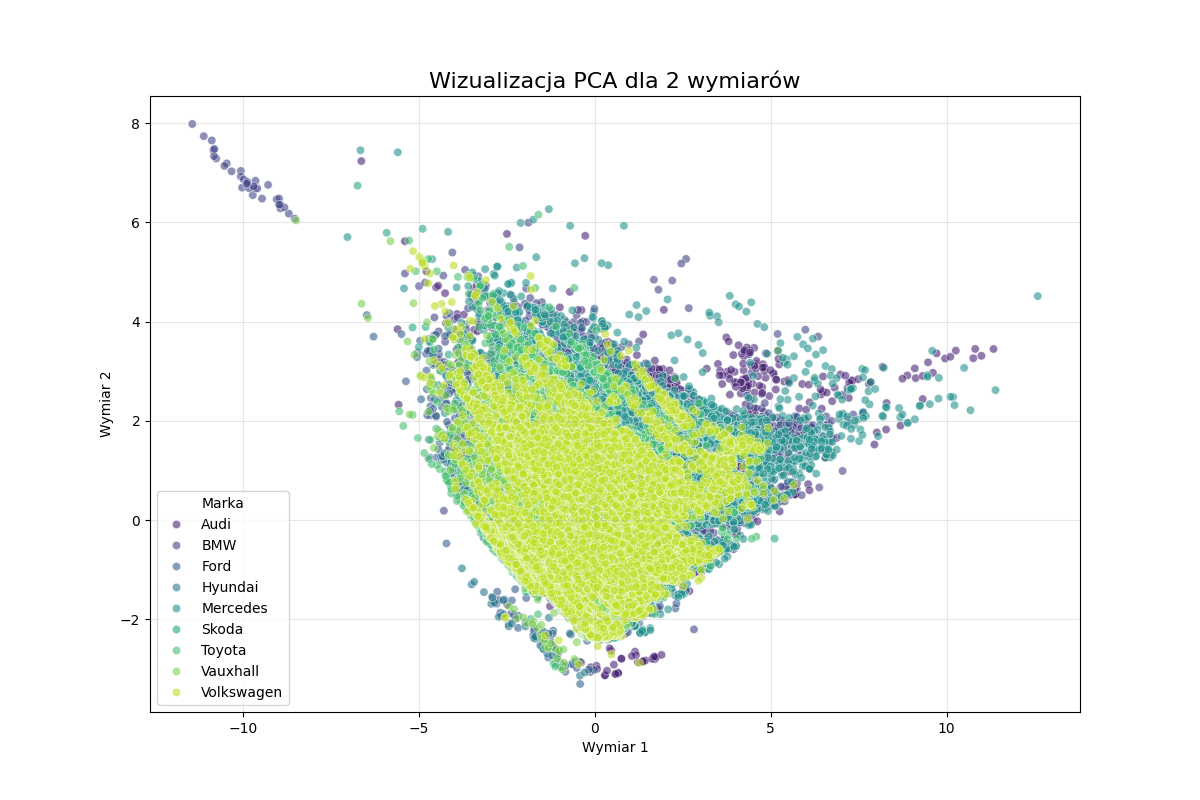

In [73]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_pca, x="Wymiar 1", y="Wymiar 2", hue="Label", palette="viridis", alpha=0.6)
plt.title("Wizualizacja PCA dla 2 wymiarów", fontsize=16)
plt.xlabel("Wymiar 1")
plt.ylabel("Wymiar 2")
plt.legend(title="Marka")
plt.grid(alpha=0.3)
plt.show()

Jak widać, grupy samochodów o różnych markach nachodzą na siebie i nie ma wyraźnego podziału. Być może redukcja do 2 wymiarów nie pozwala na klarowne rozróżnienie klastrów.

In [74]:
print(pca.explained_variance_ratio_)

[0.35513663 0.24242339]


In [75]:
total_variance = np.sum(pca.explained_variance_ratio_[:2])
total_variance

0.5975600174664679

2 wymiary wyjaśniają ok. 60% wariancji. Zwiększenie liczby do 3 wymiarów na pewno podniesie wyjaśnianą wariancję, ale ważne jest, o ile.

In [76]:
pca95 = PCA(n_components=0.95)
x_pca95 = pca95.fit(dane_std)
cumulative_variance = np.cumsum(x_pca95.explained_variance_ratio_)
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'{components_95} składowych pozwala wyjaśnić ponad 95% całkowitej wariancji.')

6 składowych pozwala wyjaśnić ponad 95% całkowitej wariancji.


In [77]:
pca99 = PCA(n_components=0.99)
x_pca99 = pca99.fit(dane_std)
cumulative_variance = np.cumsum(x_pca99.explained_variance_ratio_)
components_99 = np.argmax(cumulative_variance >= 0.99) + 1
print(f'{components_99} składowych pozwala wyjaśnić ponad 99% całkowitej wariancji.')

8 składowych pozwala wyjaśnić ponad 99% całkowitej wariancji.


In [78]:
pca100 = PCA(n_components=len(dane_std.columns))
pca100.fit(dane_std)

PCA(n_components=8)

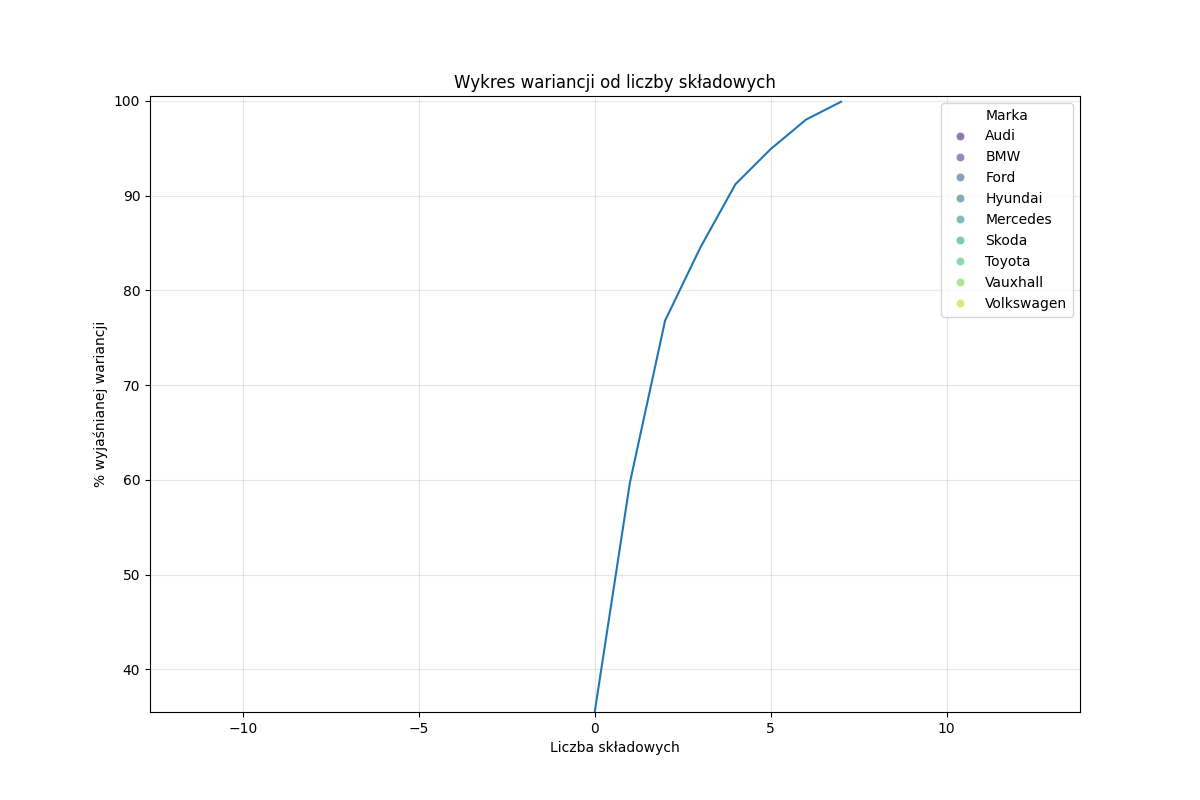

In [79]:
var = np.cumsum(np.round(pca100.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% wyjaśnianej wariancji')
plt.xlabel('Liczba składowych')
plt.title('Wykres wariancji od liczby składowych')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

Można zauważyć, że zwiększenie liczby wymiarów do 3 podniesie % wyjaśnianej wariancji o ok. 15%, więc należy to zrobić w następnym kroku.

In [80]:
pca = PCA(n_components=3)
pca.fit(dane_std)

PCA(n_components=3)

In [81]:
x_pca = pca.transform(dane_std)

In [82]:
data_pca = pd.DataFrame(data=x_pca, columns=['Wymiar 1', 'Wymiar 2', 'Wymiar 3'])
data_pca['Label'] = labels
data_pca

,Wymiar 1,Wymiar 2,Wymiar 3,Label
0,-0.466289,-1.201213,-0.366074,Audi
1,-0.767075,1.708268,0.752918,Audi
2,-1.625077,-0.540725,-0.029559,Audi
3,0.227226,1.142272,0.413965,Audi
4,0.200983,-2.121899,0.321696,Audi
...,...,...,...,...
108266,-2.388682,2.241080,-1.855203,Volkswagen
108267,-3.748104,1.118834,-3.911316,Volkswagen
108268,-2.768669,0.605888,-3.989088,Volkswagen
108269,-4.005802,1.300374,-4.280798,Volkswagen


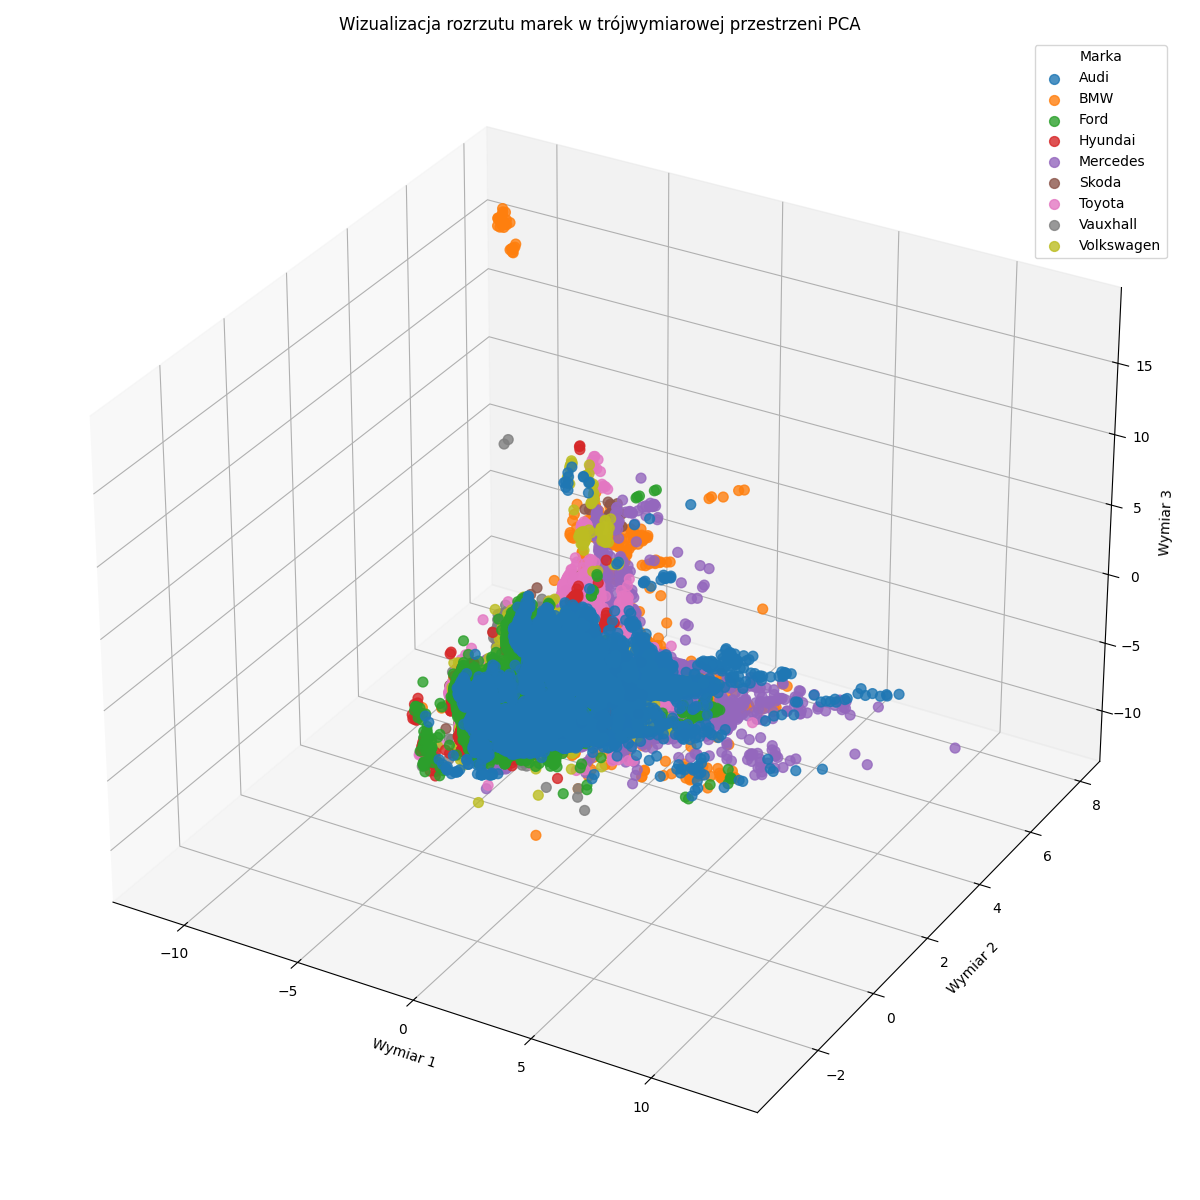

In [83]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

unique_labels = data_pca['Label'].unique()
colors = plt.cm.tab10(range(len(unique_labels)))
label_color_map = {label: color for label, color in zip(unique_labels, colors)}

for label in unique_labels:
    subset = data_pca[data_pca['Label'] == label]
    ax.scatter(subset['Wymiar 1'], subset['Wymiar 2'], subset['Wymiar 3'], 
               label=label, color=label_color_map[label], s=50, alpha=0.8)

ax.set_xlabel('Wymiar 1')
ax.set_ylabel('Wymiar 2')
ax.set_zlabel('Wymiar 3')
ax.set_title('Wizualizacja rozrzutu marek w trójwymiarowej przestrzeni PCA')

ax.legend(title='Marka')

plt.tight_layout()
plt.show()

Mimo zwiększenia liczby wymiarów do 3 klastry nadal nie są wyraźnie rozróżnialne. Można rozpocząć rozważania o tym, że ta baza używanych samochodów zawiera auta, które w większości mają zbliżone cechy, ale potwierdzi to analiza grupowania bez PCA.

In [84]:
print(pca.explained_variance_ratio_)

[0.35513663 0.24242339 0.17137425]


In [85]:
total_variance = np.sum(pca.explained_variance_ratio_[:3])
total_variance

0.7689342633239558

Tak jak wcześniej stwierdzono, odsetek wyjaśnionej wariancji wzrósł do ok. 77%, co stanowi dużą różnicę.

Teraz należy przejść do właściwej analizy grupowania, rozpocznie ją metoda k średnich dla danych po zastosowaniu PCA.

In [86]:
features = data_pca.drop(['Label'], axis=1)
features

,Wymiar 1,Wymiar 2,Wymiar 3
0,-0.466289,-1.201213,-0.366074
1,-0.767075,1.708268,0.752918
2,-1.625077,-0.540725,-0.029559
3,0.227226,1.142272,0.413965
4,0.200983,-2.121899,0.321696
...,...,...,...
108266,-2.388682,2.241080,-1.855203
108267,-3.748104,1.118834,-3.911316
108268,-2.768669,0.605888,-3.989088
108269,-4.005802,1.300374,-4.280798


In [87]:
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(features)

In [88]:
data_pca['cluster'] = clusters

In [89]:
silhouette_avg = silhouette_score(features, clusters)

In [90]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.30926366133941974


Taki wynik oznacza, że dopasowanie klastrów jest słabe, co potwierdza utworzony wcześniej wykres. Warto sprawdzić, jak samochody podzieliła metoda k średnich.

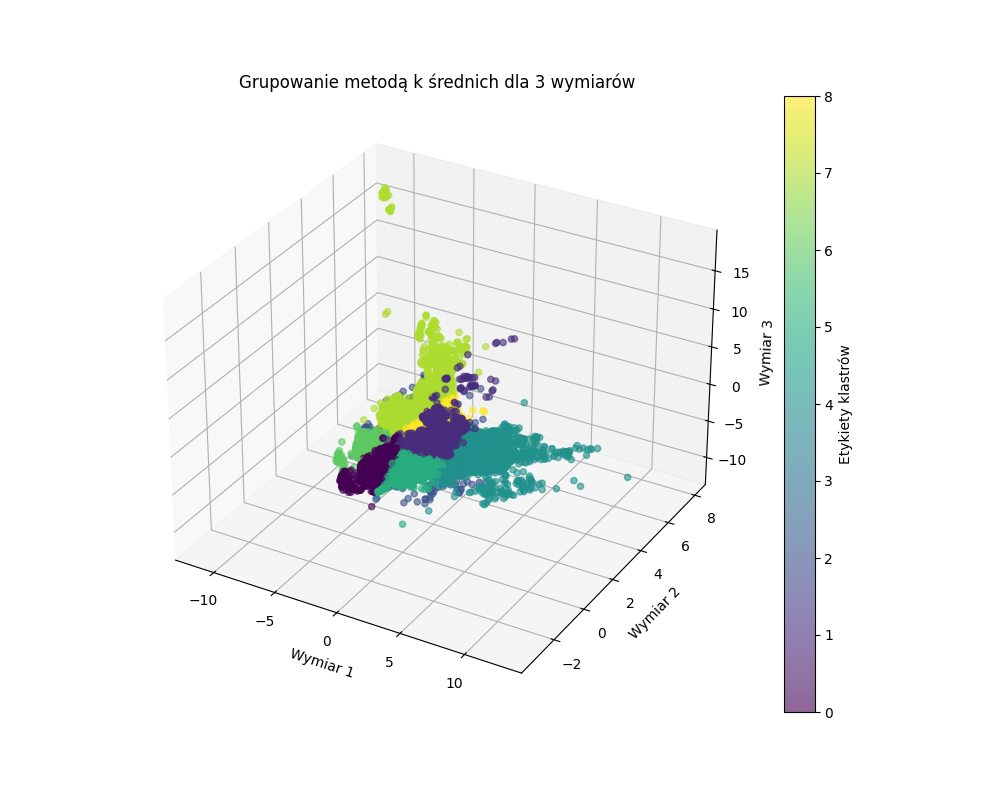

In [91]:
features = data_pca[['Wymiar 1', 'Wymiar 2', 'Wymiar 3']].to_numpy()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=clusters, cmap='viridis', marker='o', alpha=0.6)

ax.set_title("Grupowanie metodą k średnich dla 3 wymiarów")
ax.set_xlabel("Wymiar 1")
ax.set_ylabel("Wymiar 2")
ax.set_zlabel("Wymiar 3")
plt.colorbar(sc, label='Etykiety klastrów')

plt.show()

Na tym wykresie klastry zostały utworzone bazując na o wiele bardziej wyraźnym podziale, co jednak nie odzwierciedla rzeczywistego podziału. Znając wartość silhouette score wiadomo też, że poszczególne obiekty na ogół nie są umieszczone szczególnie poprawnie w swoich klastrach, ani też nie kontrastują mocno z obiektami w pozostałych klastrach.

Kolejnym etapem analizy jest algorytm DBSCAN zastosowany na danych po redukcji wymiarów. Przy tworzeniu klastrów DBSCAN bazuje na gęstości, a metoda k średnich na centroidach. Dodatkowo, w przeciwieństwie do metody k średnich, DBSCAN nie wymaga podania liczby klastrów.

In [92]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features)

In [93]:
data_pca['dbscan_cluster'] = dbscan_labels

In [94]:
n_noise = sum(dbscan_labels == -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Estymanowa liczba klastrów: {n_clusters}")
print(f"Liczba \"punktów szumu\": {n_noise}")

Estymanowa liczba klastrów: 30
Liczba "punktów szumu": 364


Algorytm DBSCAN sugeruje, że liczba klastrów wynosi 30, co bardzo mija się z rzeczywistą liczbą marek samochodów w bazie, których jest tylko 9. Liczba obserwacji, które nie pasują do żadnego klastra, czyli tzw. punkty szumu lub też wartości odstające, wynosi zaledwie 364 ("zaledwie", ponieważ baza liczy sobie ponad 100 tys. obserwacji).

In [95]:
if len(set(dbscan_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(features[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score: {silhouette_avg_dbscan}")
else:
    print("DBSCAN wykrył tylko szum.")

Silhouette Score: 0.2894310728498242


Taki wynik oznacza, że dopasowanie klastrów jest słabe. Trzeba zweryfikować na wykresie, jak samochody podzielił DBSCAN.

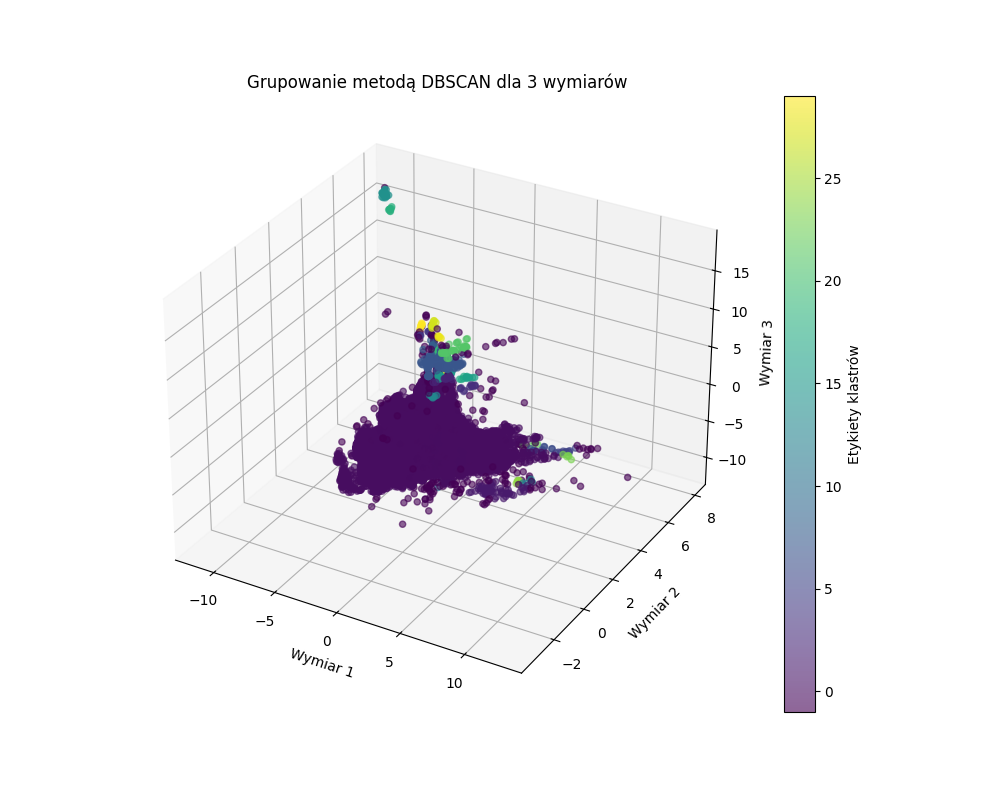

In [96]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=dbscan_labels, cmap='viridis', marker='o', alpha=0.6)

ax.set_title("Grupowanie metodą DBSCAN dla 3 wymiarów")
ax.set_xlabel("Wymiar 1")
ax.set_ylabel("Wymiar 2")
ax.set_zlabel("Wymiar 3")
plt.colorbar(sc, label='Etykiety klastrów')
plt.show()

Wykres pokazuje, że większość obserwacji została przypisana do jednego klastra, mimo stosunkowo dużej liczby klastrów. Nie zmienia to jednak faktu, że takie grupowanie ma niewiele wspólnego z rzeczywistym podziałem aut na marki.

Teraz dojdzie do analizy grupowania, ale na danych bez redukcji wymiarów.

In [97]:
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(dane_std)

In [98]:
dane_std['cluster'] = clusters

In [99]:
silhouette_avg = silhouette_score(dane_std, clusters)

In [100]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4100976727902186


Taki wynik oznacza, że dopasowanie klastrów jest umiarkowane, co jest lepszym wynikiem od metody k średnich po PCA. Prawdopodobnie wpływ na to miał % wyjaśnianej wariancji, który teraz przy wszystkich wymiarach wynosi oczywiście 100%. Niestety przy tej liczbie wymiarów wizualizacja nie jest możliwa.

In [101]:
dane_std.drop(['cluster'], axis=1)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.045626,-0.449672,-0.803465,-0.344366,-0.857710,0.485414,0.008028,-0.470317
1,-0.515782,-0.039847,0.406471,0.622005,0.941025,-1.641497,0.591721,0.606714
2,-0.515782,-0.603356,-0.803465,0.326589,-0.857710,-1.477888,0.008028,-0.470317
3,-0.045626,-0.009111,0.406471,0.138017,0.941025,0.403610,0.797340,0.606714
4,0.894687,0.042117,-0.803465,-0.992942,-0.857710,0.403610,-0.376678,-1.188337
...,...,...,...,...,...,...,...,...
108535,-2.396407,-1.116660,-0.803465,2.406544,0.941025,0.076393,0.240179,0.606714
108536,-4.277033,-1.546053,-0.803465,3.072353,-0.857710,0.403610,-0.595563,-0.829327
108537,-3.806876,-1.567467,-0.803465,2.217689,-0.857710,1.303457,-0.880776,-0.470317
108538,-5.217345,-1.602302,-0.803465,2.817493,-0.857710,0.485414,-0.595563,-0.829327


Kolejnym etapem jest zastosowanie algorytmu DBSCAN, ale tym razem na pełnowymiarowych danych.

In [102]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(dane_std)

In [103]:
dane_std['dbscan_cluster'] = dbscan_labels

In [104]:
n_noise = sum(dbscan_labels == -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Estymowana liczba klastrów: {n_clusters}")
print(f"Liczba \"punktów szumu\": {n_noise}")

Estymowana liczba klastrów: 286
Liczba "punktów szumu": 4562


Widzimy znaczne pogorszenie rezultatów grupowania. Algorytm oszacował liczbę klastrów na 286, co rzecz jasna jest całkowicie sprzeczne z rzeczywistym stanem podziału samochodów. Zwiększyła się również liczba tzw. punktów szumu do 4562, a która dla obserwacji po PCA wynosiła tylko 364.

In [105]:
if len(set(dbscan_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(features[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score: {silhouette_avg_dbscan}")
else:
    print("DBSCAN wykrył tylko szum.")

Silhouette Score: -0.2759038038867093


Taki wynik świadczy o tym, że grupowanie jest na tyle słabe, że spora część obserwacji jest całkowicie niepoprawnie przypisana do klastra, a poza tym klastry nachodzą na siebie i są wyjątkowo niewyraźne. Niestety z powodu zbyt dużej liczby wymiarów nie możemy zwizualizować wyników grupowania.

## Podsumowanie

Badany zbiór danych jest obszerny i ujawnia wiele ciekawych informacji o rynku używanych samochodów w Wielkiej Brytanii w ostatnich latach. Jednak przed rozpoczęciem analizy baza była wybrakowana i częściowo niespójna, ale przy pomocy kilku operacji i algorytmów udało się ją doprowadzić do używalności.<br>Redukcja wymiarów przy pomocy PCA pozwoliła zwizualizować podział samochodów wg marek, przy jednoczesnym uwzględnieniu różnych atrybutów. Okazuje się, że auta są w dużej mierze bardzo podobne pod względem osiągów, ceny i innych aspektów. Być może zjawisko to zostało spotęgowane przez uzupełnanie brakujących danych na podstawie już istniejących obserwacji.<br>Najlepszym grupowaniem okazało się grupowanie metodą k średnich na pełnowymiarowej bazie danych, a najgorszym grupowanie algorytmem DBSCAN, również na pełnowymiarowym zestawie danych. Redukcja liczby wymiarów sprawiła, że wyniki algorytmu k średnich uległy pogorszeniu, a dla algorytmu DBSCAN poprawiły się.